In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("../data/cs-training.csv")

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 🏦 Proje: Give Me Some Credit (Kredi Skorlama Analizi)

## 🎯 Projenin Amacı
Bankalar, piyasa ekonomilerinde kimin finansmana erişebileceğine karar vererek yatırım kararlarını şekillendiren kritik bir rol oynar. Piyasaların ve toplumun sağlıklı işlemesi için bireylerin ve şirketlerin krediye erişimi şarttır. 

Bu projenin temel amacı, **kredi skorlama algoritmalarını** geliştirerek bir kişinin önümüzdeki **iki yıl içinde finansal sıkıntı yaşama olasılığını** tahmin etmektir. 250.000 borçluya ait tarihsel veriler kullanılarak inşa edilecek bu model, hem bankaların daha doğru kararlar almasını sağlar hem de borçluların en iyi finansal kararları vermesine yardımcı olur.

---

## 🌍 Gerçek Hayat Kullanım Senaryosu
Bir bankanın kredi onay masasındasın. Önüne gelen bir başvuruyu değerlendirirken modelin sana şu analizi yapar:
> "Bu müşterinin aylık geliri (**MonthlyIncome**) yüksek görünüyor ancak borç oranı (**DebtRatio**) 1'in üzerinde, yani kazandığından fazlasını borca harcıyor. Ayrıca kredi limitlerinin çoğunu (**RevolvingUtilization**) doldurmuş. Geçmişindeki kısa süreli gecikmeler de eklenince, bu kişinin önümüzdeki 2 yıl içinde temerrüde düşme (**SeriousDlqin2yrs**) ihtimali çok yüksek. Kredi riskli!"

---

## ## 📋 Veri Seti Değişken Tanımları

| Kolon Adı | Veri Tipi | Rolü | Gerçek Hayat Karşılığı ve İş Mantığı |
| :--- | :--- | :--- | :--- |
| **SeriousDlqin2yrs** | **Target** | **Hedef Değişken** | **Kriz Durumu:** Kişinin 2 yıl içinde 90 gün veya daha fazla borcunu ödeyememe durumu (1: Riskli, 0: Güvenilir). |
| **RevolvingUtilizationOfUnsecuredLines** | Feature | **Kredi Kullanım Oranı** | **Limit Doluluğu:** Toplam kredi kartı/hat bakiyesinin limitlere oranı. %100'e yakınsa kişi nakit sıkıntısı çekiyordur. |
| **age** | Feature | **Yaş** | **Demografik Risk:** Borçlunun yaşı. Yaş ilerledikçe finansal istikrarın artması beklenir. |
| **NumberOfTime30-59DaysPastDueNotWorse** | Feature | **Hafif Gecikme** | **Erken Uyarı:** Son 2 yılda borcun 1-2 ay geciktirilme sayısı. Kronikleşirse büyük risk habercisidir. |
| **DebtRatio** | Feature | **Borç Oranı** | **Finansal Yük:** Aylık borç ödemeleri ve yaşam giderlerinin toplam gelire oranı. 1'den büyükse kişi borç sarmalındadır. |
| **MonthlyIncome** | Feature | **Aylık Gelir** | **Ödeme Gücü:** Kişinin beyan ettiği aylık net kazancı. |
| **NumberOfOpenCreditLinesAndLoans** | Feature | **Açık Kredi Sayısı** | **Kredi Çeşitliliği:** Kişinin yönetimindeki aktif kredi ve kart sayısı. Çok fazlası takibi zorlaştırır. |
| **NumberOfTimes90DaysLate** | Feature | **Ağır Gecikme** | **Temerrüt:** Borcun 3 ay ve üzeri ödenmemesi. En ciddi risk göstergesidir. |
| **NumberRealEstateLoansOrLines** | Feature | **Emlak Kredisi** | **Varlık/Borç Dengesi:** Konut kredisi veya ipotekli hat sayısı. Genelde stabilite işaretidir ama aşırısı yüktür. |
| **NumberOfTime60-89DaysPastDueNotWorse** | Feature | **Orta Gecikme** | **Kritik Eşik:** Borcun 2-3 ay arası ödenmediği, durumun yasal takibe yaklaştığı evre. |
| **NumberOfDependents** | Feature | **Bağımlı Sayısı** | **Gider Çarpanı:** Kişinin bakmakla yükümlü olduğu aile bireyi sayısı. Harcanabilir geliri doğrudan etkiler. |
| **Unnamed: 0** | Index | **ID** | **Sıra No:** Veri takibi için kullanılan kimlik numarası; model eğitiminden önce kaldırılmalıdır. |

---

In [4]:
df.shape

(150000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
df.duplicated().sum()   

np.int64(0)

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

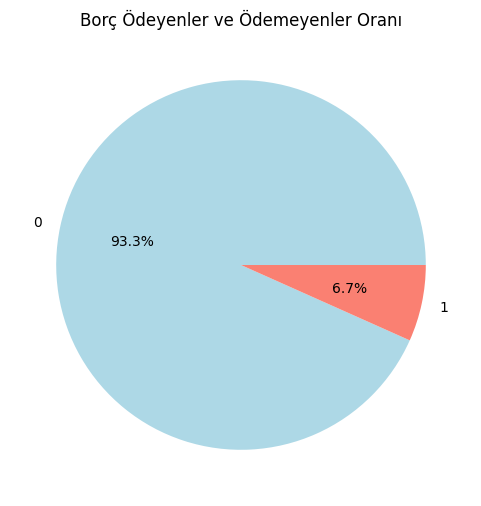

In [8]:
plt.figure(figsize=(6,6))
df["SeriousDlqin2yrs"].value_counts().plot.pie(autopct="%1.1f%%",colors=["lightblue","salmon"])
plt.title("Borç Ödeyenler ve Ödemeyenler Oranı")
plt.ylabel("")
plt.show()

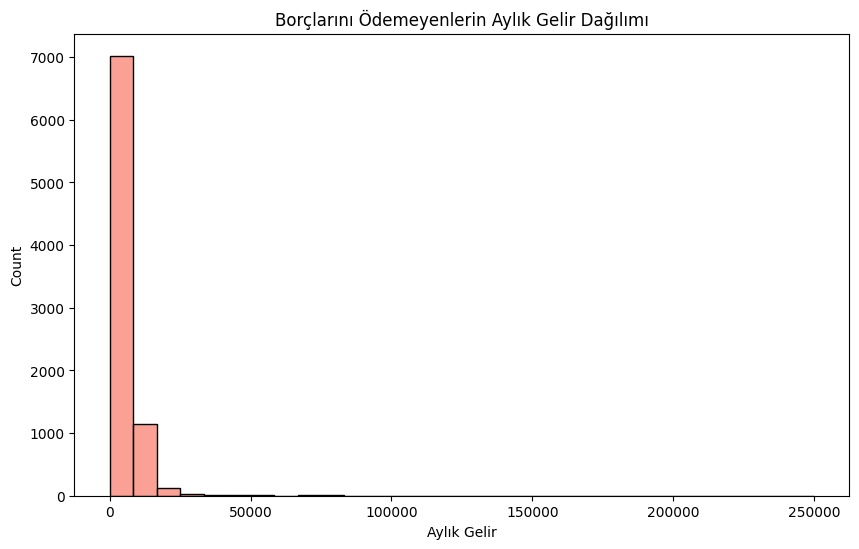

In [9]:
## borçlarını ödemeyenlerin aylık geliri
plt.figure(figsize=(10,6))
sns.histplot(df[df["SeriousDlqin2yrs"]==1]["MonthlyIncome"],bins=30,color="salmon")
plt.title("Borçlarını Ödemeyenlerin Aylık Gelir Dağılımı")
plt.xlabel("Aylık Gelir")   
plt.show()

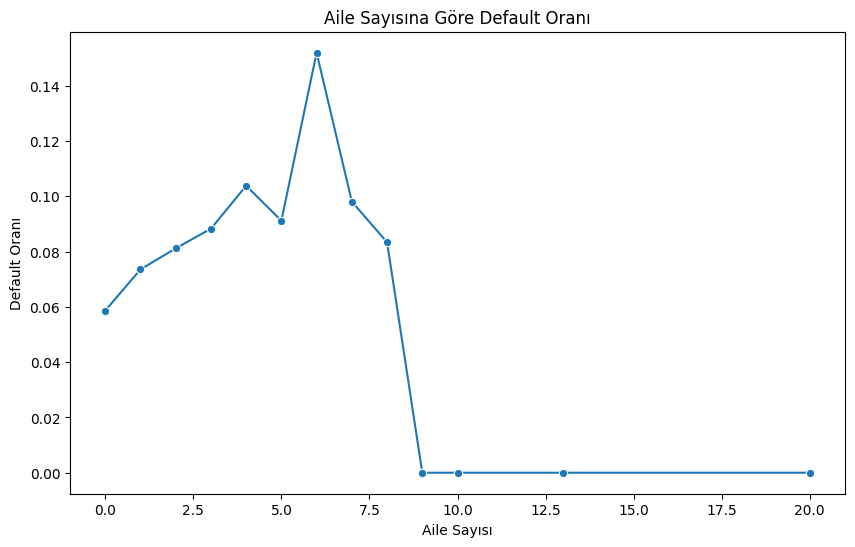

In [10]:
##aile sayısına göre borç ödeme oranı
agg = df.groupby("NumberOfDependents")["SeriousDlqin2yrs"] \
        .agg(["mean", "count"]) \
        .reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=agg, 
             x="NumberOfDependents", 
             y="mean", 
             marker="o")

plt.title("Aile Sayısına Göre Default Oranı")
plt.xlabel("Aile Sayısı")
plt.ylabel("Default Oranı")
plt.show()

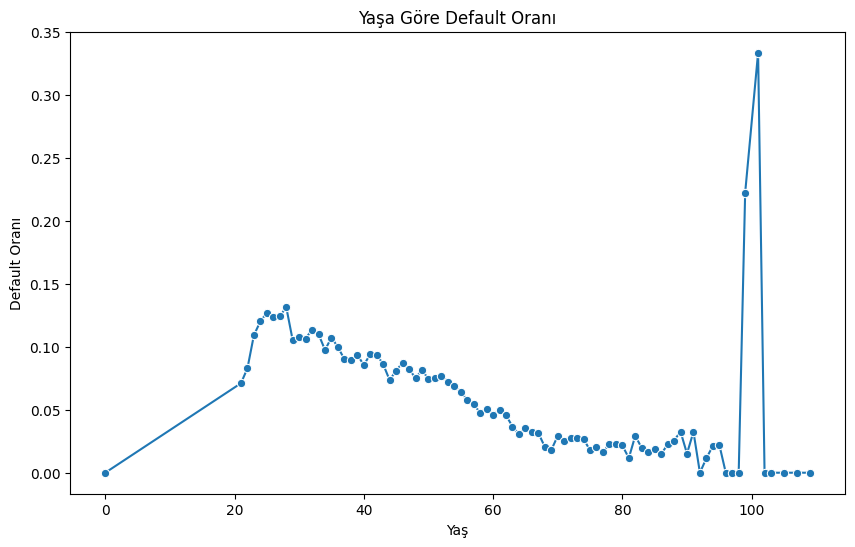

In [11]:
##yaşa göre ödeme oranları 
agg = df.groupby("age")["SeriousDlqin2yrs"] \
        .agg(["mean", "count"]) \
        .reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=agg,
                x="age", 
                y="mean", 
                marker="o") 
plt.title("Yaşa Göre Default Oranı")
plt.xlabel("Yaş")
plt.ylabel("Default Oranı")
plt.show()

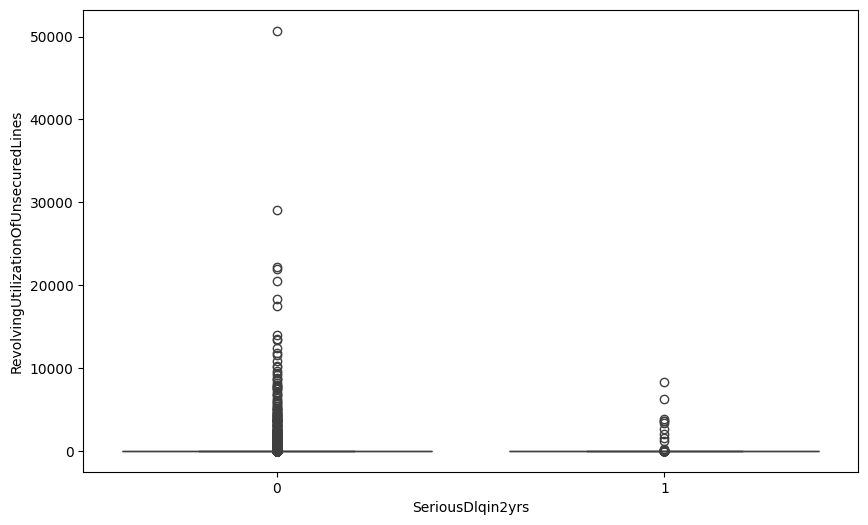

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x="SeriousDlqin2yrs",
            y="RevolvingUtilizationOfUnsecuredLines",
            data=df)
plt.show()

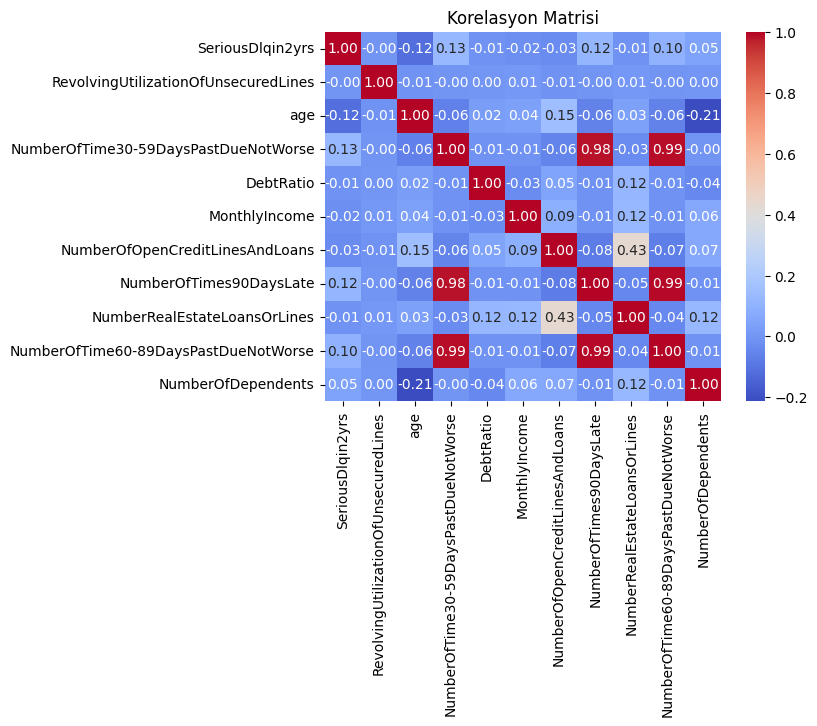

In [13]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [14]:
## eksik değerleri görme
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
df["MonthlyIncome"].value_counts()

MonthlyIncome
5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
           ... 
10194.0       1
9464.0        1
11179.0       1
10043.0       1
516.0         1
Name: count, Length: 13594, dtype: int64

In [16]:
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)

In [17]:
df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

In [18]:
df["NumberOfDependents"].fillna(df["NumberOfDependents"].mode()[0], inplace=True)

In [19]:
df["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [20]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [21]:
find_outliers_iqr(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
outlier_count,10026.000,763.000000,46.000000,23982.000,31311.000000,9149.000000,3980.000000,8338.000000,793.000000,7604.000000,13336.000000
outlier_percentage,6.684,0.508667,0.030667,15.988,20.874000,6.099333,2.653333,5.558667,0.528667,5.069333,8.890667
lower_bound,0.000,-0.763901,8.000000,0.000,-0.864696,-1342.500000,-4.000000,0.000000,-3.000000,0.000000,-1.500000
upper_bound,0.000,1.352814,96.000000,0.000,1.908024,12645.500000,20.000000,0.000000,5.000000,0.000000,2.500000


In [22]:
df[df["age"]<18].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [23]:
## age 18 den küçük olanları sil
df = df[df["age"] >= 18]


In [24]:
df[df["age"]>90].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
208,0,0.046640,92,1,0.034327,2650.0,13,0,0,0,0.0
320,0,0.016478,92,0,10.000000,5400.0,3,0,0,0,0.0
436,0,0.007000,97,0,3.000000,5400.0,2,0,0,0,0.0
509,0,1.000000,91,0,0.000000,5400.0,3,0,0,0,0.0
582,0,0.159116,91,0,0.184123,1813.0,6,0,0,0,0.0


In [25]:
df=df[df["age"] < 90]

In [26]:
df.shape

(149312, 11)

In [32]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

NumberOfOpenCreditLinesAndLoans
6     13542
7     13188
5     12852
8     12534
4     11526
9     11328
10     9603
3      8960
11     8291
12     6992
2      6591
13     5657
14     4539
1      4381
15     3638
16     2996
17     2369
0      1882
18     1870
19     1432
20     1168
21      864
22      685
23      532
24      420
25      336
26      239
27      193
28      149
29      114
30       87
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
43        8
42        8
45        8
37        7
48        6
54        4
49        4
41        4
46        3
52        3
47        2
51        2
57        2
56        2
44        2
50        2
58        1
53        1
Name: count, dtype: int64

In [33]:
x=df.drop("SeriousDlqin2yrs",axis=1)
y=df["SeriousDlqin2yrs"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

In [64]:

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
}

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, accuracy_score
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    roc_auc=roc_auc_score(true, predicted)
    return accuracy, precision, recall, f1, cm, roc_auc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  roc_auc_score, confusion_matrix

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = roc_auc_score(y_train, y_train_pred)

    # Test Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Accuracy :", train_accuracy)
    print("Precision:", train_precision)
    print("Recall   :", train_recall)
    print("F1 Score :", train_f1)

    print("-----------------------------------")

    print("Model performance for Test Set")
    print("Accuracy :", test_accuracy)
    print("Precision:", test_precision)
    print("Recall   :", test_recall)
    print("F1 Score :", test_f1)

    print("-----------------------------------\n")

LightGBM
Model performance for Training Set
Accuracy : 0.9417324548552102
Precision: 0.7017678708685626
Recall   : 0.2279650436953808
F1 Score : 0.3441387108933283
-----------------------------------
Model performance for Test Set
Accuracy : 0.937079328935472
Precision: 0.5947611710323575
Recall   : 0.1928071928071928
F1 Score : 0.2912108638249717
-----------------------------------

